## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [3]:
pip install scikit-learn

DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [231]:
df = pd.read_csv("C:/Users/eun01/Downloads/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [163]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [164]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [232]:
features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = df['Outcome']

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [233]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                                      test_size=0.3,
                                                      random_state=123,
                                                      shuffle=True,
                                                      stratify=target)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

0.2 ; test size가 커지면 모델이 학습 데이터에 너무 과적합되므로 오차가 급격히 증가한다.

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

train 단계에서 클래스들의 비율까지 일정하게 맞춰줄 때 사용한다.

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [234]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def clf_eval(y_true, y_pred, y_pred_proba):
    confusion = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])

    print("Confusion Matrix:\n", confusion)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    
clf_eval(y_test, pred, pred_proba)


Confusion Matrix:
 [[57 93]
 [51 30]]
Accuracy: 0.37662337662337664
Precision: 0.24390243902439024
Recall: 0.37037037037037035
F1 Score: 0.2941176470588235
ROC AUC Score: 0.3452674897119341


2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

Confusion Matrix는 오차행렬로 Training을 통한 prediction 성능을 측정하기 위해 예측 값과 실제 값을 비교하기 위한 표이다.

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train, y_train)
pred = logistic_regression.predict(x_valid)
pred_proba = logistic_regression.predict_proba(x_valid)


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

비용함수의 최솟값을 어떠한 방법으로 찾을 것인지를 지정하는 역할

1. newton-cg : 여러 번의 업데이트를 통해 비용함수를 최소화하는 파라미터 값을 찾음
2. lbfgs : 2차 도함수를 정확하게 계산하는 것이 아니라 근사치를 사용함
3. liblinear : 경사하강법과 비슷하지만 한 번에 하나의 파라미터만 업데이트함
4. sag : 이전 업데이트 단계에서의 경사값을 현재 업데이트에 사용함
5. saga : l1, l2, elsticnet, none까지 모두 사용 가능하게 지원됨

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

1. pred : 각각 모델의 최종적인 예측값을 출력
2. pred_proba : 각 클래스에 대한 확률을 모두 출력

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [236]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #X축, y축 label과 legend, grid 설정
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()


2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

C:\Users\eun01\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


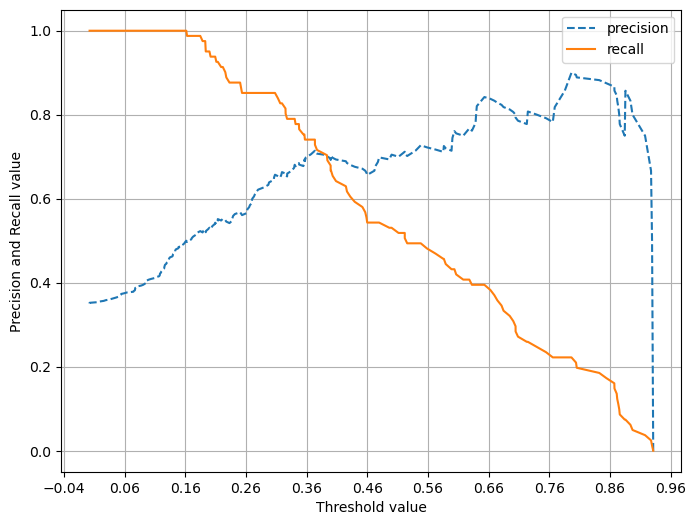

In [237]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred_proba_c1 = lr_clf.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [110]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [194]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체
a = df['Glucose'].mean()
b = df['BloodPressure'].mean()
c = df['SkinThickness'].mean()
d = df['Insulin'].mean()
e = df['BMI'].mean()

df['Glucose'] = df['Glucose'].replace(0, a)
df['BloodPressure'] = df['BloodPressure'].replace(0, a)
df['SkinThickness'] = df['SkinThickness'].replace(0, a)
df['Insulin'] = df['Insulin'].replace(0, a)
df['BMI'] = df['BMI'].replace(0, a)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,74.614985,56.269608,138.672597,33.724140,0.471876,33.240885,0.348958
std,3.369578,30.436016,15.770971,42.801250,86.769787,12.562976,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,120.670898,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,73.000000,35.000000,120.894531,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,82.000000,120.894531,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,120.894531,846.000000,120.894531,2.420000,81.000000,1.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [213]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x_train)

num_samples_to_keep = x_train.shape[0]  # x_train의 샘플 수로 설정
target = target[:num_samples_to_keep]

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

서로 다른 변수의 값들의 범위를 일정한 수준으로 맞추는 작업
1. 표준화
2. 정규화

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [214]:
x_train_scaled, x_valid_scaled, y_train, y_valid = train_test_split(x_scaled, target, 
                                                                    test_size=0.3,
                                                                    random_state=123,
                                                                    shuffle=True,
                                                                    stratify=target)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [215]:
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train_scaled, y_train)
pred = logistic_regression.predict(x_valid)
pred_proba = logistic_regression.predict_proba(x_valid)

clf_eval(y_test, pred, pred_proba)

Confusion Matrix:
 [[57 93]
 [51 30]]
Accuracy: 0.37662337662337664
Precision: 0.24390243902439024
Recall: 0.37037037037037035
F1 Score: 0.2941176470588235
ROC AUC Score: 0.3452674897119341


C:\Users\eun01\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\eun01\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [218]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   --------------------------------------- 257.7/257.7 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [220]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [223]:
# 5-fold 교자 검증 사용
scores = cross_val_score(logistic_regression, x_scaled, target, cv=5, scoring='accuracy')

# 각 폴드에서의 정확도 출력
print("Cross-Validation Accuracy Scores:", scores)

# 평균 정확도 출력
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.64814815 0.64814815 0.64485981 0.63551402 0.65420561]
Mean Accuracy: 0.6461751471097265
